Try out different clustering models in the given dataset (Wine). Find the optimum number of clusters in each model and create the model with optimum number of clusters. Also learn about dB scan clustering and implement it.

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ["OMP_NUM_THREADS"] = '1'

Reading file



In [2]:
data = pd.read_csv("Wine_clust.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


checking number of rows and columns

In [3]:
data.shape

(178, 13)

finding details of column data 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Checking null values

In [7]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


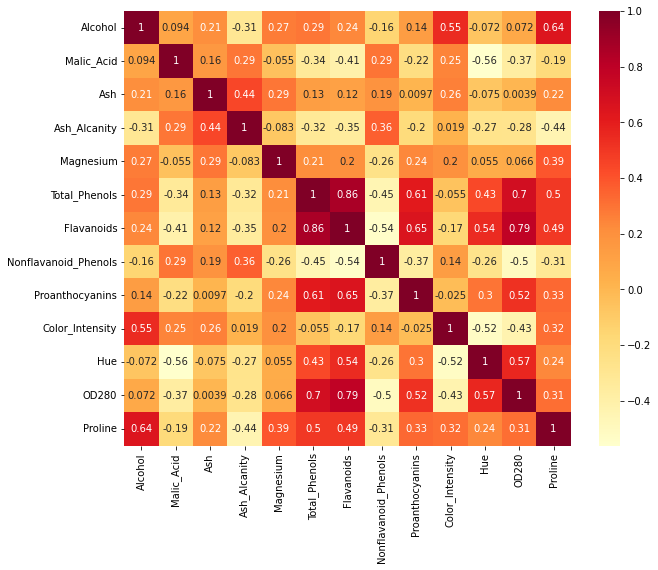

In [10]:
plt.subplots(figsize = (10,8))
sns.heatmap(data.corr(), annot = True, cmap = 'YlOrRd')
plt.show()

Checking for outliers and removing

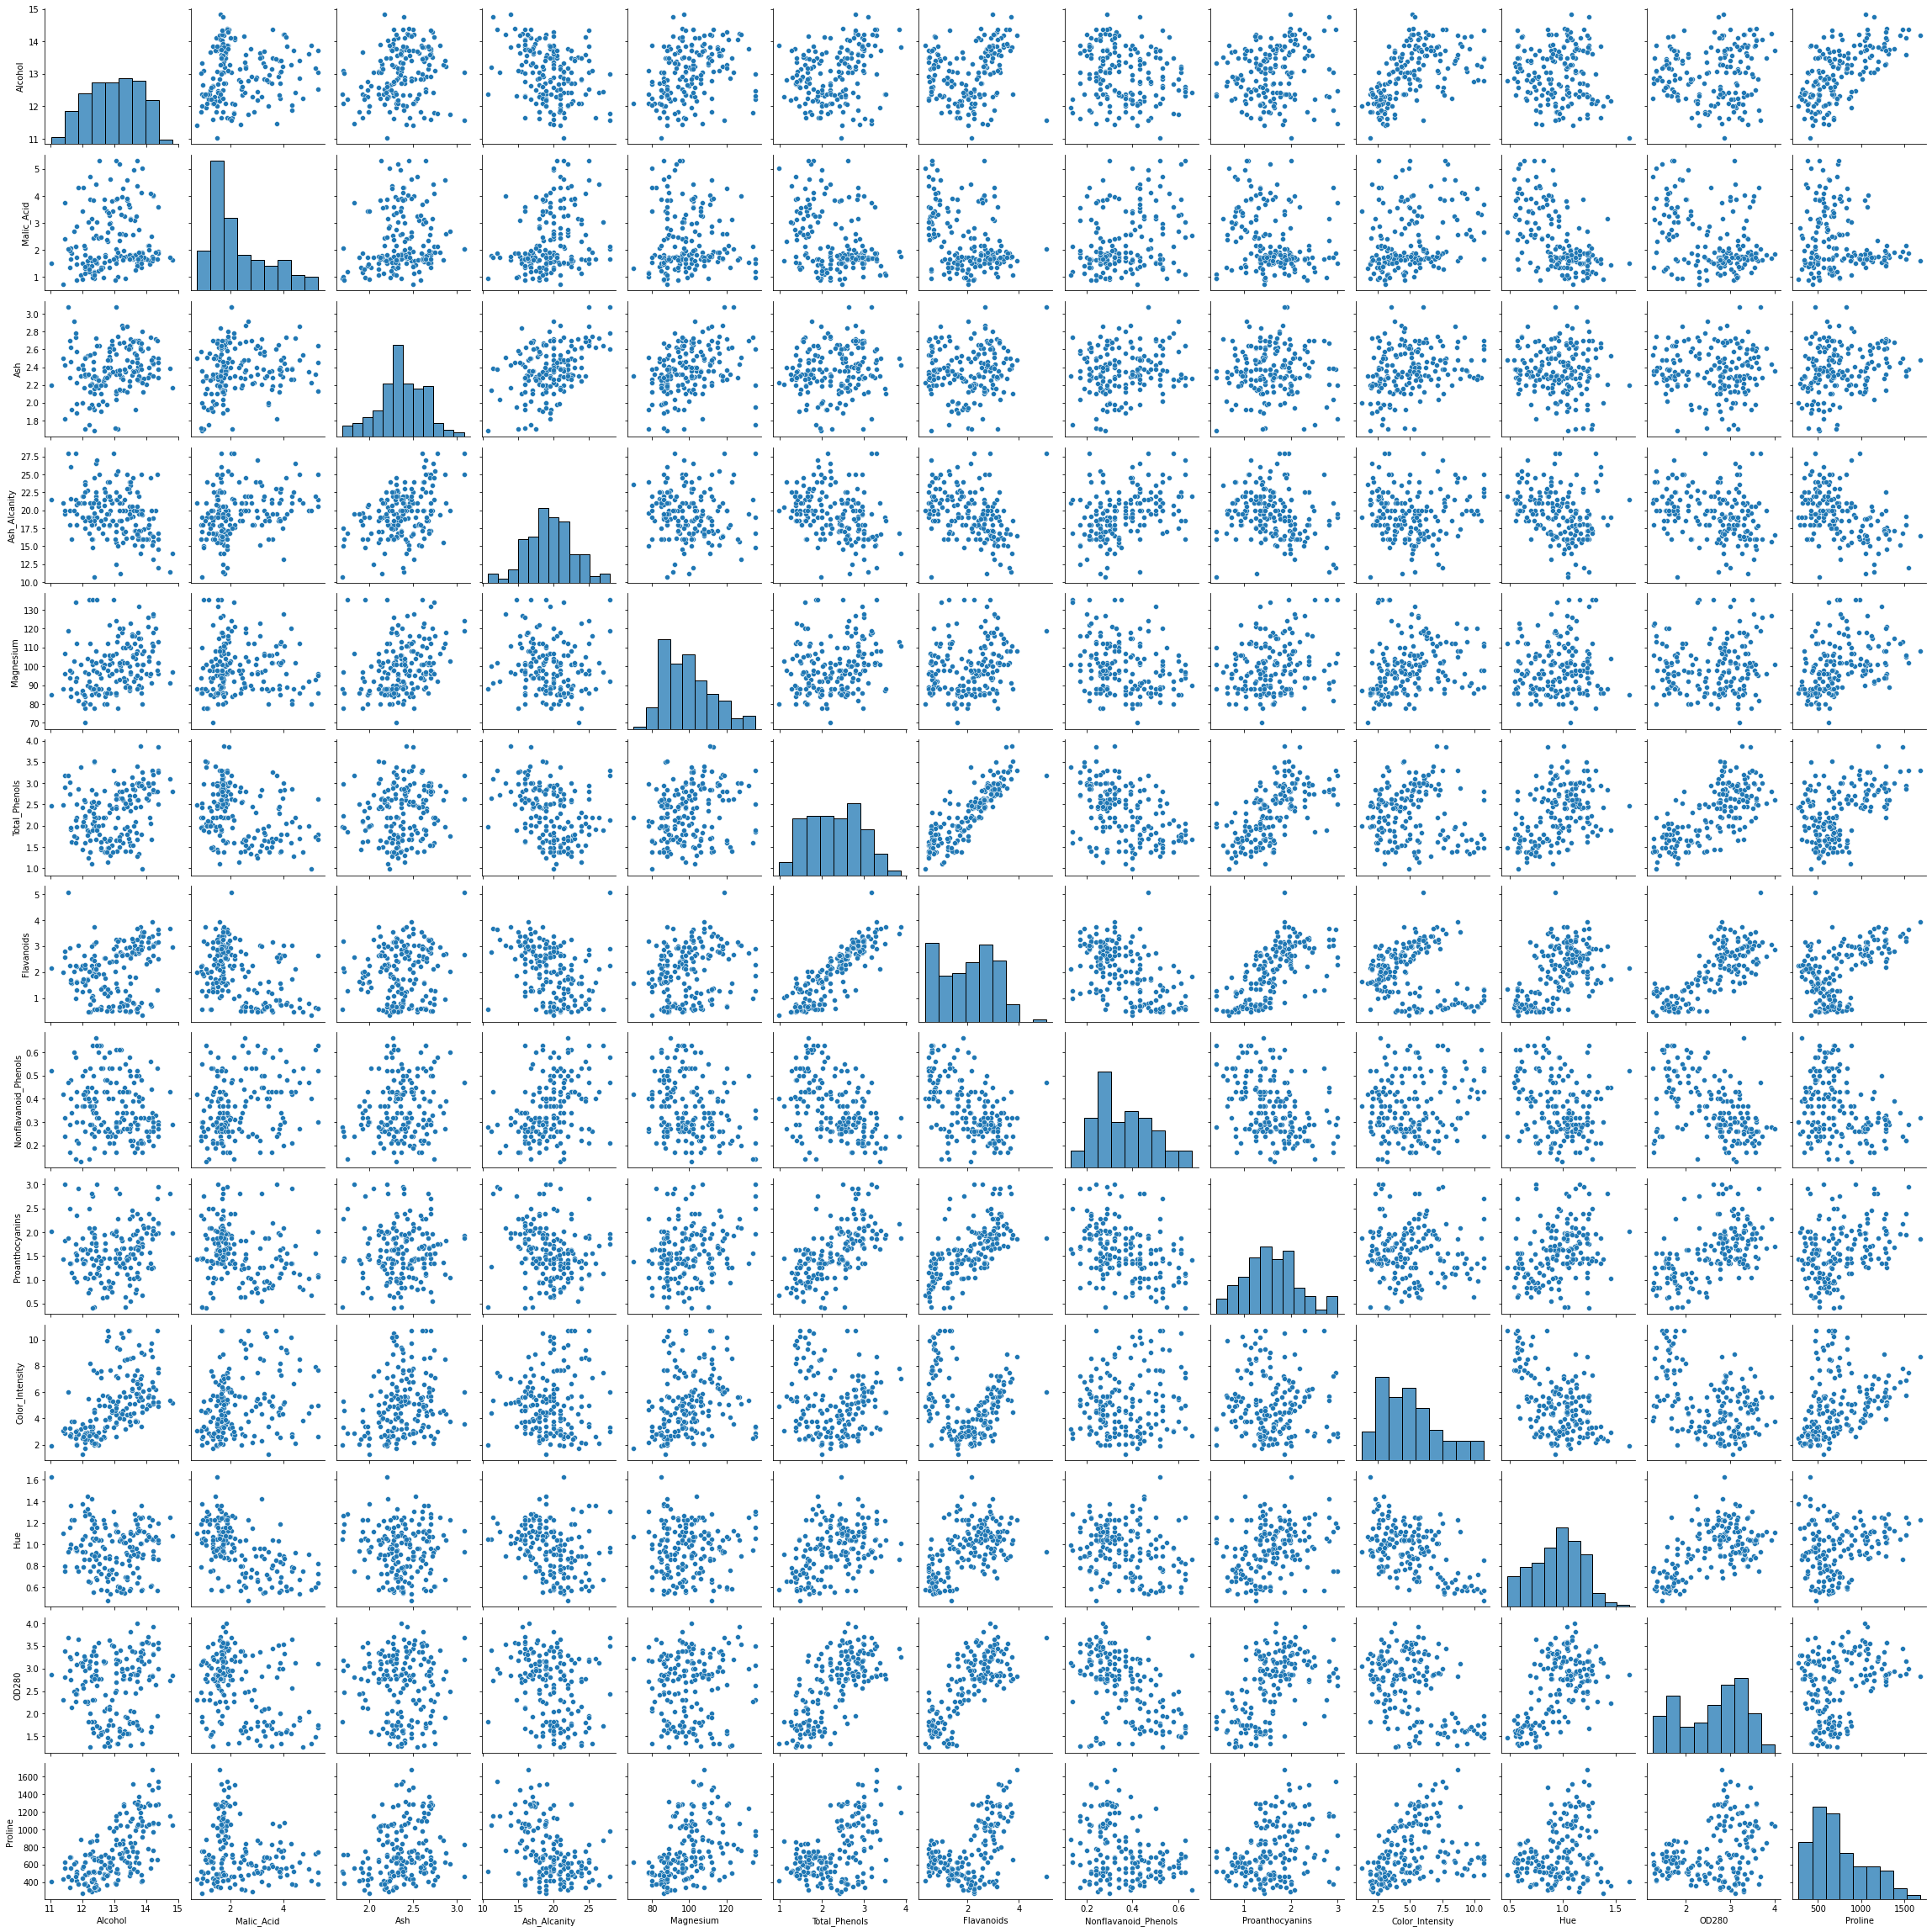

In [33]:
sns.pairplot(data)
plt.show()

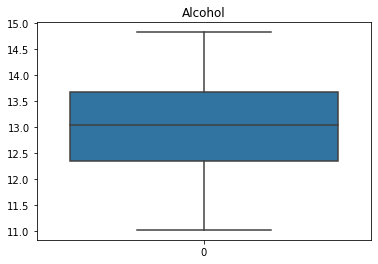

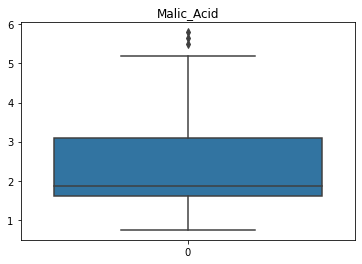

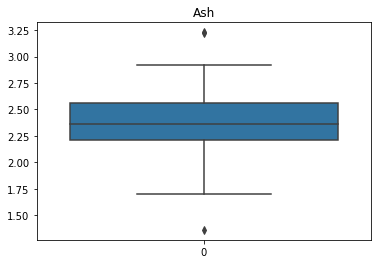

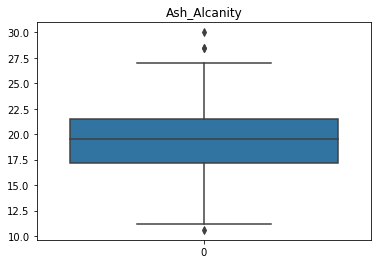

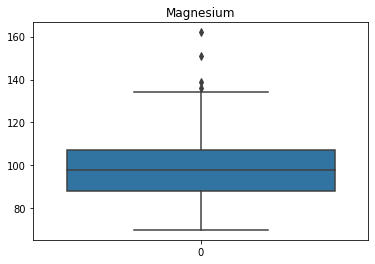

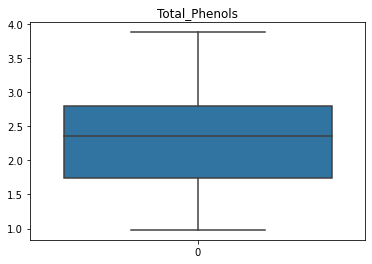

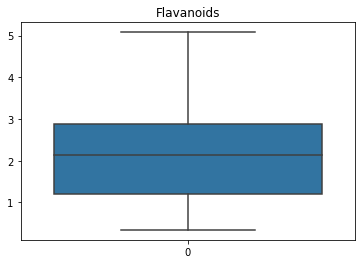

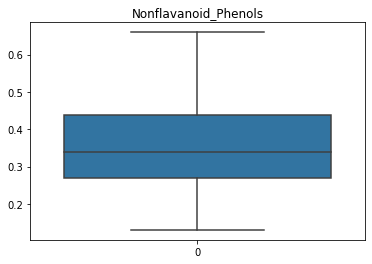

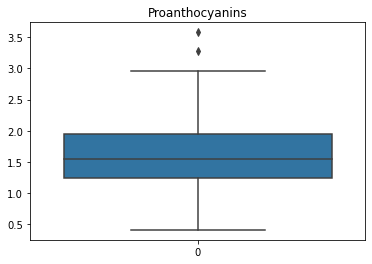

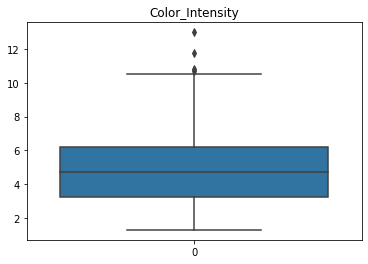

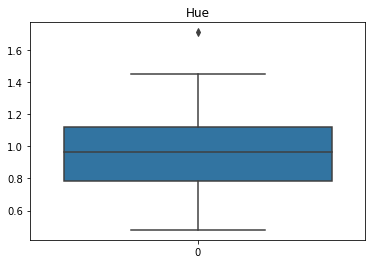

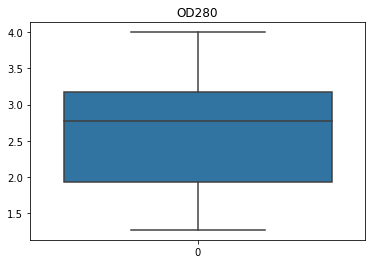

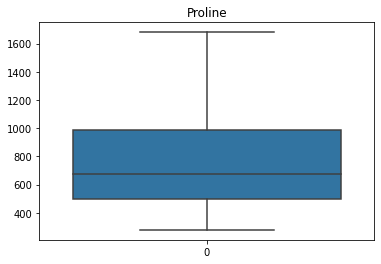

In [12]:
for i in data.columns:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

In [13]:
for i in data.columns:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    data[i].where(data[i] > lower_limit, lower_limit, inplace = True)
    data[i].where(data[i] < upper_limit, upper_limit, inplace = True)

Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
scaled_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.90)
pca.fit(scaled_data)
data_pca = x_pca = pca.transform(scaled_data)
np.sum(pca.explained_variance_ratio_)

0.9194722395122922

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.90)
pca.fit(scaled_data)
data_pca = x_pca = pca.transform(scaled_data)
np.sum(pca.explained_variance_ratio_)

0.9194722395122922

Kmeans clustering

In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init = 10)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

In [18]:
wcss

[2127.6587622314446,
 1468.740726255215,
 1080.9565640724434,
 982.7338993029044,
 909.6538293805493,
 865.5989230687366,
 807.616049044447,
 753.4717503260258,
 731.8061831294845,
 686.0151256831896,
 650.3230483459345,
 628.7876379516498]

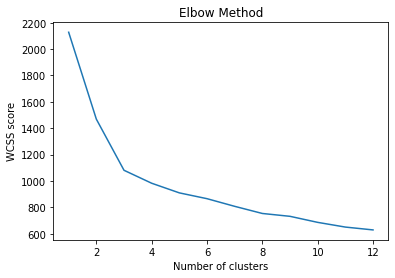

In [19]:
plt.plot(range(1,13), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS score")
plt.show()

from this we can see its 3 clusters

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42, n_init = 10)
y_kmeans = kmeans.fit_predict(data_pca)

In [21]:
from sklearn.metrics import silhouette_score
print(silhouette_score(data_pca, y_kmeans))

0.3152941778058695


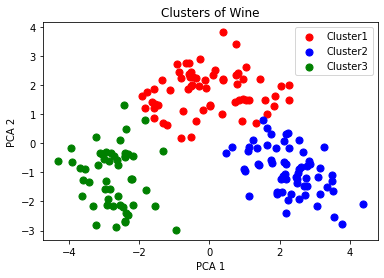

In [22]:
plt.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0,1], s = 50, c = 'red', label = 'Cluster1')
plt.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1,1], s = 50, c = 'blue', label = 'Cluster2')
plt.scatter(data_pca[y_kmeans == 2, 0], data_pca[y_kmeans == 2,1], s = 50, c = 'green', label = 'Cluster3')
plt.title('Clusters of Wine')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

Agglomorative Hierarchical clustering

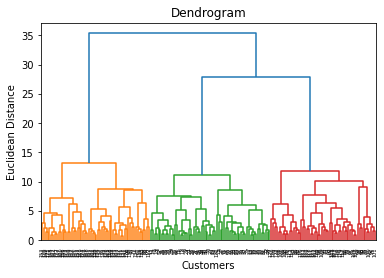

In [23]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_pca, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

number of cluster = 3

In [24]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_pca)
silhouette_avg = silhouette_score(data_pca, y_hc)
print(silhouette_avg)

0.30155366413947937


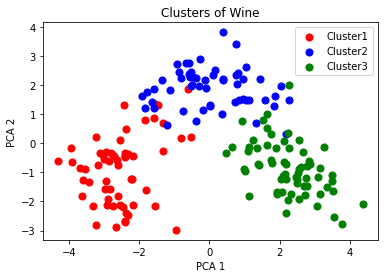

In [25]:
plt.scatter(data_pca[y_hc == 0, 0], data_pca[y_hc == 0,1], s = 50, c = 'red', label = 'Cluster1')
plt.scatter(data_pca[y_hc == 1, 0], data_pca[y_hc == 1,1], s = 50, c = 'blue', label = 'Cluster2')
plt.scatter(data_pca[y_hc == 2, 0], data_pca[y_hc == 2,1], s = 50, c = 'green', label = 'Cluster3')
plt.title('Clusters of Wine')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

DB scan

In [26]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors = 16)
neighbors_fit = neighbors.fit(data_pca)
distances, indices = neighbors_fit.kneighbors(data_pca)

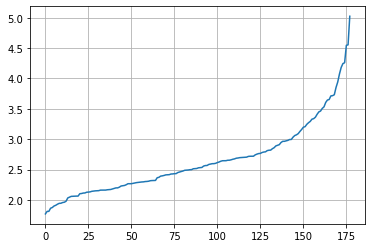

In [27]:
distances = np.sort(distances, axis=0)
plt.plot(distances[:,-1])
plt.grid()
plt.show()

optimum value is around 3

In [28]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=2.5, min_samples=16).fit(data_pca)
labels = db.labels_

In [29]:
np.unique(labels)

array([-1,  0,  1])

In [30]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 25


In [31]:
silhouette_avg = silhouette_score(data_pca, labels)
print(silhouette_avg)

0.2393862926615565


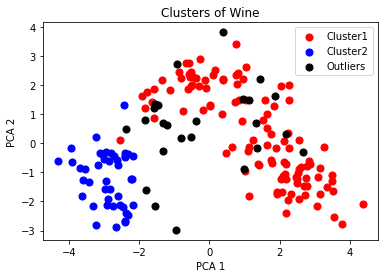

In [32]:
plt.scatter(data_pca[labels == 0, 0], data_pca[labels == 0,1], s = 50, c = 'red', label = 'Cluster1')
plt.scatter(data_pca[labels == 1, 0], data_pca[labels == 1,1], s = 50, c = 'blue', label = 'Cluster2')
plt.scatter(data_pca[labels == -1, 0], data_pca[labels == -1,1], s = 50, c = 'black', label = 'Outliers')
plt.title('Clusters of Wine')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

From these we can conclude kmeans perform better the others